In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import torch
import matplotlib.pyplot as plt

import pickle
import yaml
import numpy as np
from RetaredHarmonicDynamics import animate_particle
from matplotlib import animation
from scipy.stats import moment
from scipy.special import factorial, lambertw, erf
from pathlib import Path

tensor = torch.tensor

from my_functions import get_pos, get_mean_std, FokkerPlankCalculator, time_delayed_harmonic, damped_harmonic_oszillator
from my_functions import get_approx_freq,get_zero, get_pos_with_border, get_pos_mirror

pic_path = Path('Graphic_Results/')

save_run = False

In [2]:
border = 0.8e-3
max_t = 8
dt = 4e-3
D = 1e-6

num = 10000
tau = 0
k = 15

torch.manual_seed(0)
pos_normal = get_pos(num_particle=num, k = k, tau=tau, D=D,dt = dt, max_t=max_t,)
torch.manual_seed(0)
pos_abs = get_pos_with_border(border=border,num_particle=num, k = k, tau=tau, D=D,dt = dt, max_t=max_t)
torch.manual_seed(0)
pos_mirror = get_pos_mirror(x_m=border,num_particle=num, k = k, tau=tau,D=D, dt = dt, max_t=max_t)

In [3]:
pos_normal.shape, pos_abs.shape, pos_mirror.shape

(torch.Size([2000, 10000, 1]),
 torch.Size([2000, 10000, 1]),
 torch.Size([2000, 10000, 1]))

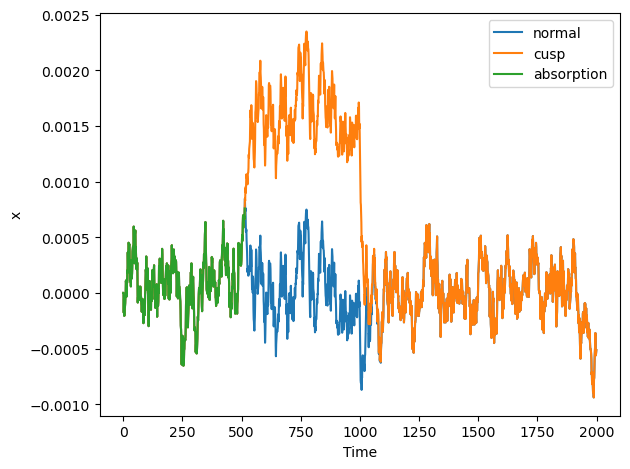

In [4]:
plt.plot(pos_normal[:,0], label='normal')
plt.plot(pos_mirror[:,0]+border, label='cusp')
plt.plot(pos_abs[:,0], label='absorption')
plt.xlabel('Time')
plt.ylabel('x')
plt.tight_layout()
plt.legend()

In [5]:
particles_abs = (~pos_abs.isnan()).sum(1)
particles_mirror = (pos_mirror < 0).sum(1)

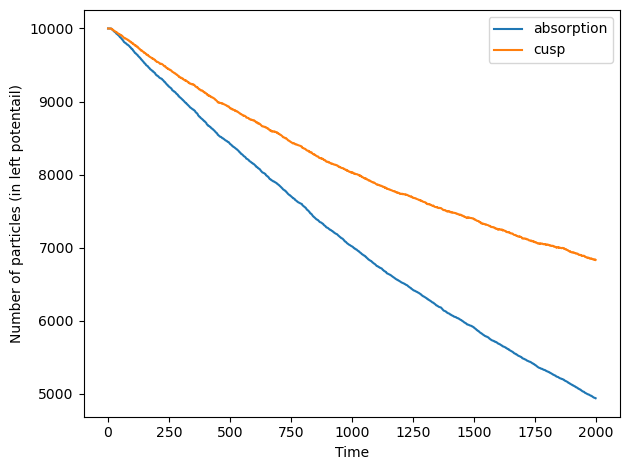

In [6]:
plt.plot(particles_abs, label='absorption')
plt.plot(particles_mirror, label='cusp')
plt.xlabel('Time')
plt.ylabel('Number of particles (in left potentail)')
plt.legend()
plt.tight_layout()

In [7]:
crossings_raw = ((pos_mirror[1:]*pos_mirror[:-1]).sign() + pos_mirror[:-1].sign() == -2).sum(axis=1)+0.
diff_raw = particles_abs.diff(dim=0)*1.

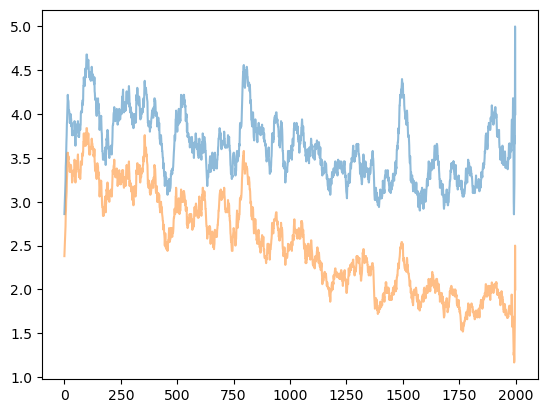

In [8]:
mean_bin = 50

crossings_raw = crossings_raw.squeeze()
crossing_mean = torch.stack([crossings_raw.repeat(mean_bin,1).diag(i).mean() for i in range(len(crossings_raw))])

diff_raw = diff_raw.squeeze()
diff_mean = torch.stack([diff_raw.repeat(mean_bin,1).diag(i).mean() for i in range(len(diff_raw))])

plt.plot(crossing_mean, alpha = 0.5)
plt.plot(-diff_mean, alpha = 0.5)

In [9]:
tensor([[1,2,3],[2,3,4]]).diag(3)

tensor([], dtype=torch.int64)

In [10]:
diff_mean.unsqueeze(1)

tensor([[-2.3800],
        [-2.4600],
        [-2.5200],
        ...,
        [-1.6667],
        [-2.5000],
        [-2.0000]])